In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(12, 6))

In [46]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import numpy as np
from matplotlib.colors import ListedColormap
# load dataset
data = load_wine()

In [47]:
# print dataset description
print(data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [48]:
# class labels
labels = data.feature_names
labels

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [49]:
# Feature는 proline과 alcohol 선택하자.
X = data.data[:, [0, 12]]
X[0]

array([  14.23, 1065.  ])

In [50]:
# target vector
y = data.target
y[0]

0

In [51]:
estimator = DecisionTreeClassifier(max_depth=2)

estimator.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

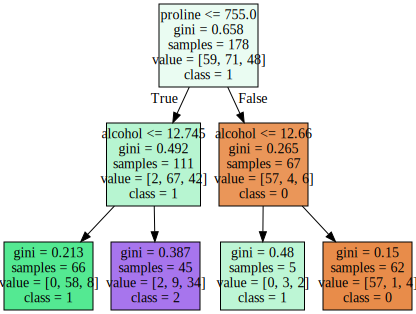

In [52]:
graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                    feature_names=['alcohol', 'proline'], class_names=['0', '1', '2'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

Text(12.7,1600,'Depth=1')

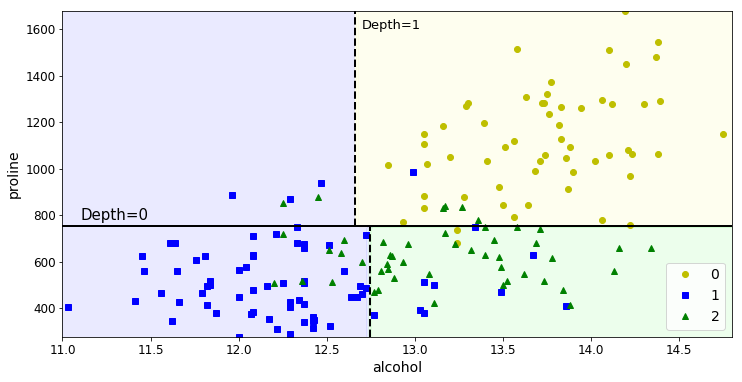

In [105]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[11.0, 14.8, 278, 1680], legend=False, plot_training=True):
    # axes는 x축과 y축을 의미한다. 100개씩 segmentation 한다.
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # Pred 값을 구한다.
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.2, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="0")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="1")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="2")
        plt.axis(axes)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    plt.xlabel("alcohol", fontsize=14)
    plt.ylabel("proline", fontsize=14)

plot_decision_boundary(estimator, X, y, legend=True)
plt.plot([11.0, 14.8], [755, 755], "k-", linewidth=2)
plt.plot([12.745, 12.745], [278, 755], "k--", linewidth=2)
plt.plot([12.66, 12.66], [755, 1680], "k--", linewidth=2)
plt.text(11.1, 780, "Depth=0", fontsize=15)
plt.text(12.7, 1600, "Depth=1", fontsize=13)